# Notebook 7 - Traitement Automatique des Langues (TAL)

CSI4506 Intelligence Artificielle \
Automne 2021 \
Version 1 (2020) preparée par Julian Templeton, Caroline Barrière et Joel Muteba.  Version 2 (2021) modifiée par Caroline Barrière.

***INTRODUCTION***:  

La Covid-19 a changé notre vie quotidienne et a eu un impact mondial. Une grande partie de ce qui se passe dans le monde nous est rapportée par les nouvelles, sous forme de texte.

Dans ce notebook, nous allons exécuter des techniques de Traitement Automatique des Langues (TAL) sur un ensemble de nouvelles liées à Covid-19. Le terme utilisé en TAL pour référer à un ensemble de textes est le terme *corpus*.  Ainsi, nous utiliserons ce terme *corpus* pour désigner l'ensemble des textes.

Nous ferons de la tokenisation, de la lemmatisation, de l'étiquetage des parties du discours (POS), de la suppression des mots vides et plus encore sur des phrases individuelles provenant des articles de presse (partie 1 du Notebook) et ensuite sur l'ensemble du corpus (partie 2 du Notebook). Vous utiliserez la bibliothèque de TAL [spaCy](https://spacy.io/) pour exécuter ces techniques TAL. Cette bibliothèque simplifie l'exécution de ces opérations complexes pour du texte dans une langue spécifiée.

Cela vous permettra d'explorer la pipeline TAL et d'analyser le contenu de textes provenant du corpus. Vous allez également créer des nuages de mots basés sur le texte modifié du corpus entier. Cela nous permettra de visualiser les mots clés des articles afin de mieux comprendre quel contenu y est le plus important.

Dans les vidéos du cours, nous avons aussi parlé de *reconnaissance d'entités nommées* (NER).  Cette tâche ne sera pas explorée dans le présent notebook, mais plutôt dans le prochain.

Pour ce notebook, vous devrez installer les packages suivants en plus des bibliothèques précédemment utilisées:     
1) [spaCy](https://spacy.io/usage): pip install -U spacy      
2) spaCy's English package (change the command according to your environment, ex: python vs py): py -m spacy download en          
3) [WordCloud](https://amueller.github.io/word_cloud/): pip install wordcloud      
4) MultiDict: pip install multidict     

**Note:** Dans le code ci-bas, des options seront montrées pour l'installation des divers packages si vous travaillez sur colab.

***DEVOIR***:  \

Parcourez le notebook en exécutant chaque cellule, une à la fois.

Recherchez **(TO DO)** pour les tâches que vous devez effectuer. Ne modifiez pas le code en dehors des questions auxquelles vous êtes invité à répondre à moins que cela ne vous soit spécifiquement demandé. Une fois que vous avez terminé, signez le notebook (à la fin du notebook), modifiez son nom pour NumEtudiant-NomFamille-Notebook7.ipynb et soumettez-le.

*Le notebook sera noté sur 25. \
Chaque **(TO DO)** est associé à un certain nombre de points.*
***

In [1]:
# Already installed on colab, you might need to install it locally
!pip install -U spacy

You should consider upgrading via the 'c:\users\mark\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [2]:
# Already installed on colab, you might need to install it locally
!pip install wordcloud

You should consider upgrading via the 'c:\users\mark\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [3]:
# NOT installed on colab, should be installed
!pip install multidict

You should consider upgrading via the 'c:\users\mark\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [4]:
# Before starting we will import every module that we will be using
import pandas as pd
import matplotlib.pyplot as plt
import multidict as multidict
import spacy
from spacy import displacy
from wordcloud import WordCloud

In [5]:
# The core spacy object that will be used for tokenization, lemmatization, POS Tagging, ...
# Note that this is specifically for the English language and requires the English package to be installed
# via pip to work as intended.

# sp = spacy.load('en')

# If the above causes an error after installing the package described in the introduction (point 2), 
# then install the package as below
!spacy download en_core_web_sm
sp = spacy.load('en_core_web_sm')

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


You should consider upgrading via the 'c:\users\mark\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


**PARTIE 1 - Analyse des phrases**  

Dans cette partie, nous utiliserons les modules de *spaCy* pour effectuer les différentes étapes du pipeline TAL sur des phrases du fichier inclus sur les articles de presse liés à la Covid-19 provenant de CBC. Le corpus (news.csv) est inclus avec cette soumission, mais les détails le concernant peuvent être trouvés [ici](https://www.kaggle.com/ryanxjhan/cbc-news-coronavirus-articles-march-26?select=news.csv). 

La première chose que nous allons faire est de charger le fichier dans un dataframe pandas et se donner une idée du contenu.

In [6]:
# Read the dataset, show top rows
df = pd.read_csv("news.csv")
df.head(20)

Unnamed: 0                                            authors  \
0           0                                                 []   
1           1                                                 []   
2           2                             ['The Canadian Press']   
3           3                                                 []   
4           4                                                 []   
5           5  ['Senior Writer', 'Chris Arsenault Is A Senior...   
6           6                                       ['Cbc News']   
7           7                                       ['Cbc News']   
8           8  ['Senior Writer', "Adam Miller Is Senior Digit...   
9           9                                ['Thomson Reuters']   
10         10                                       ['Cbc News']   
11         11                                ['Thomson Reuters']   
12         12                           ['The Associated Press']   
13         13                                ['Thomson Reuters']   
14         14                                       ['Cbc News']   
15         15                                                 []   
16         16  ['Video Journalist', "Colin Butler Is A Vetera...   
17         17                                ['Thomson Reuters']   
18         18                                       ['Cbc News']   
19         19                                ['Thomson Reuters']   

                                                title      publish_date  \
0   'More vital now:' Gay-straight alliances go vi...   2020-05-03 1:30   
1   Scientists aim to 'see' invisible transmission...   2020-05-02 8:00   
2   Coronavirus: What's happening in Canada and ar...  2020-05-02 11:28   
3   B.C. announces 26 new coronavirus cases, new c...  2020-05-02 18:45   
4   B.C. announces 26 new coronavirus cases, new c...  2020-05-02 18:45   
5   Brazil has the most confirmed COVID-19 cases i...   2020-05-02 8:00   
6    The latest on the coronavirus outbreak for May 1  2020-05-01 20:43   
7   Coronavirus: What's happening in Canada and ar...  2020-05-01 11:51   
8   Did the WHO mishandle the global coronavirus p...   2020-04-30 8:00   
9   Armed people in Michigan's legislature protest...  2020-04-30 21:37   
10  The latest on the coronavirus outbreak for Apr...  2020-04-30 21:05   
11  Brazil using mass graves in Amazon region as c...  2020-04-30 12:11   
12  Coronavirus 'not manmade or genetically modifi...  2020-04-30 16:47   
13  Coronavirus will trigger biggest ever plunge i...  2020-04-30 13:47   
14  Coronavirus: What's happening in Canada and ar...  2020-04-30 11:40   
15  Her greatest fear was dying alone — two days a...  2020-04-30 11:00   
16  COVID-19's strain brought these London chariti...   2020-04-30 9:00   
17  China angered by Australian call for internati...  2020-04-29 14:06   
18  The latest on the coronavirus outbreak for Apr...  2020-04-29 20:44   
19  Beloved British WWII vet who raised millions f...  2020-04-30 11:05   

                                          description  \
0   Lily Overacker and Laurell Pallot start each g...   
1   Some researchers aim to learn more about how t...   
2   Canada's chief public health officer struck an...   
3   B.C. provincial health officer Dr. Bonnie Henr...   
4   B.C. provincial health officer Dr. Bonnie Henr...   
5   From describing coronavirus as a "little flu,"...   
6   The latest on the coronavirus outbreak from CB...   
7   Nova Scotia announced Friday it is immediately...   
8   The World Health Organization has come under f...   
9   Hundreds of protesters, some armed, gathered a...   
10  The latest on the coronavirus outbreak from CB...   
11  Deaths from the coronavirus outbreak have pile...   
12  U.S. intelligence agencies said Thursday they ...   
13  Economic lockdowns brought on by the coronavir...   
14  Alberta becomes the latest province to unveil ...   
15  The 65-year-old should have spent her last day...   
16  The strain of coronavirus

Tout d'abord, nous afficherons le texte d'un article et copierons manuellement les phrases qui seront utilisées pour cette partie du Notebook. Notez que de nombreuses balises sont enregistrées dans l'ensemble de données, mais nous ne nous en soucierons pas pour le moment.

In [7]:
df["text"][1]

'This is an excerpt from\xa0Second Opinion, a\xa0weekly\xa0roundup of eclectic and under-the-radar health and medical science news emailed to subscribers every Saturday morning.\xa0If you haven\'t subscribed yet, you can do that by\xa0clicking here.  The coronavirus that causes COVID-19 spreads through droplets that we spew as we breathe, talk, cough and sneeze —\xa0so tiny that they\'re invisible to the naked eye.\xa0 That\'s why\xa0questions remain about the virus\'s transmission and what precautions need to be taken to curb its spread as governments begin to lift restrictions. Will it help if everyone wears a mask? Is keeping everyone two metres apart far enough? Some researchers aim to learn more about transmission by trying to make invisible sneezes, coughs and breaths more visible. Here\'s a closer look at that research and what it might reveal. How do scientists think COVID-19 is transmitted? According to the World Health Organization, the disease spreads primarily through tiny 

À partir de ce texte, nous sélectionnerons une phrase qui sera utilisée par les exemples fournis dans le notebook, *sentence_example*, et cinq phrases que vous utiliserez pour répondre à cinq questions dans cette section, *sentence1*, ... *sentence5*. Les phrases 4 et 5 sont les mêmes car cette phrase est idéale pour les deux questions.

In [8]:
# Sentence to be used for running examples
sentence_example = "Government guidelines in Canada recommend that people stay at least two metres away from others as part of physical distancing measures to curb the spread of COVID-19."
# Sentences to be used for future questions
sentence1 = "I think those are provocative and those are hypothesis- generating, but then they need to be tested in the field.\" Loeb is running such a field test himself — a randomized controlled trial of the use of medical versus N95 masks among health care workers to see if there is a difference in the transmission of COVID-19."
sentence2 = "The World Health Organization recommends that people wear masks if they are coughing and sneezing or if they are caring for someone who is sick."
sentence3 = "Will it help if everyone wears a mask?"
sentence4 = "Infection control guidelines do recommend extra personal protective equipment (including N-95 respirators) to protect against airborne transmission for healthcare workers performing procedures that generate high concentrations of aerosolized particles, such as intubations, on COVID-19 patients, McGeer said."
sentence5 = "Infection control guidelines do recommend extra personal protective equipment (including N-95 respirators) to protect against airborne transmission for healthcare workers performing procedures that generate high concentrations of aerosolized particles, such as intubations, on COVID-19 patients, McGeer said."

Nous allons maintenant explorer comment spaCy peut être appliqué sur une phrase pour effectuer différentes opérations. 

Tout d'abord, nous passerons la phrase exemple dans notre objet spacy *sp* pour récupérer la tokenisation, la lemmatisation, les valeurs de dépendance, les parties du discours (Part-of-speech, POS), et plus encore de la phrase. Comme vous le verrez, spaCy rend ce processus très facile.

In [9]:
# Call our spaCy object to retrieve the results of running the sentence through the NLP Pipeline
# Note that we can reuse the sp variable without redefining it.
sentence_example_content = sp(sentence_example)
for token in sentence_example_content:
    print("Text: " + str(token.text) + " Lemma: " + str(token.lemma_) + " POS: " + token.pos_ + 
          " Dependency: " + token.dep_)

Text: Government Lemma: government POS: NOUN Dependency: compound
Text: guidelines Lemma: guideline POS: NOUN Dependency: nsubj
Text: in Lemma: in POS: ADP Dependency: prep
Text: Canada Lemma: Canada POS: PROPN Dependency: pobj
Text: recommend Lemma: recommend POS: VERB Dependency: ROOT
Text: that Lemma: that POS: SCONJ Dependency: mark
Text: people Lemma: people POS: NOUN Dependency: nsubj
Text: stay Lemma: stay POS: VERB Dependency: ccomp
Text: at Lemma: at POS: ADV Dependency: advmod
Text: least Lemma: least POS: ADV Dependency: advmod
Text: two Lemma: two POS: NUM Dependency: nummod
Text: metres Lemma: metre POS: NOUN Dependency: npadvmod
Text: away Lemma: away POS: ADV Dependency: advmod
Text: from Lemma: from POS: ADP Dependency: prep
Text: others Lemma: other POS: NOUN Dependency: pobj
Text: as Lemma: as POS: ADP Dependency: prep
Text: part Lemma: part POS: NOUN Dependency: pobj
Text: of Lemma: of POS: ADP Dependency: prep
Text: physical Lemma: physical POS: ADJ Dependency: amod

In [10]:
# We will take a look at the dependency tree to view how the words relate to each other
displacy.render(sentence_example_content, style='dep', jupyter=True, options={'distance': 120})

Dans le code ci-dessus, nous voyons que nous sommes en mesure d'accéder aux balises de l'arbre de dépendances pour chaque token en appelant *.dep_*. Cependant, nous pouvons aussi directement accéder aux éléments de l'arbre de dépendances (comme vu dans le code ci-dessous). Pour plus d'exemples sur la façon de naviguer dans les arbres de dépendances, vous pouvez jeter un œil à [quelques exemples officiels de spaCy](https://spacy.io/usage/linguistic-features#dependency-parse). Cependant, vous trouverez ci-dessous des détails suffisants pour réaliser ce notebook.

En regardant l'arbre de dépendances ci-dessus, nous voyons que les mots ont des flèches pour représenter les relations. Chacun d'entre eux a une étiquette montrant le type de dépendance entre les jetons (tokens). Par exemple, "government" est étiqueté avec une dépendance *compound* du nom 'guidelines', ce qui montre que 'government guidelines' est un *compound* (nom composé).

Dans le code, après avoir analysé et divisé le texte avec spaCy en tokens, il est possible d'accéder aux mots auxquels un token est connecté par des flèches (ses dépendants, appelés aussi ses enfants). Ceci est présenté dans le code ci-dessous.

Notez que lors de l'accès à un nœud enfant, vous pouvez accéder aux propriétés de la même manière que vous le feriez pour un token spaCy (.pos_, ...).

In [11]:
# Display how to access the dependency children within a dependency tree
for token in sentence_example_content:
    print("Current token: " + token.text)
    print("All children of this token:", list(token.children))
    print("Left children of this token:", list(token.lefts))
    print("Right children of this token:", list(token.rights))
    print()

Current token: Government
All children of this token: []
Left children of this token: []
Right children of this token: []

Current token: guidelines
All children of this token: [Government, in]
Left children of this token: [Government]
Right children of this token: [in]

Current token: in
All children of this token: [Canada]
Left children of this token: []
Right children of this token: [Canada]

Current token: Canada
All children of this token: []
Left children of this token: []
Right children of this token: []

Current token: recommend
All children of this token: [guidelines, stay, .]
Left children of this token: [guidelines]
Right children of this token: [stay, .]

Current token: that
All children of this token: []
Left children of this token: []
Right children of this token: []

Current token: people
All children of this token: []
Left children of this token: []
Right children of this token: []

Current token: stay
All children of this token: [that, people, away, as, curb]
Left chil

**(TO DO) Q1(a) - 1 point**  
Utilisez spaCy pour faire passer la phrase *sentence1* au travers de la pipeline TAL et déterminer le nombre de tokens dans la phrase. Montrez aussi tous les tokens trouvés dans la phrase *sentence1*.

In [12]:
# RÉPONSE Q1(a)
# Show tokens and print how many tokens
sentence1_content = sp(sentence1)
print("Sentence: ", sentence1)
print("Nombre de token: ",len(sentence1_content))
print("Token: ")
for token in sentence1_content:
    print(token)


Sentence:  I think those are provocative and those are hypothesis- generating, but then they need to be tested in the field." Loeb is running such a field test himself — a randomized controlled trial of the use of medical versus N95 masks among health care workers to see if there is a difference in the transmission of COVID-19.
Nombre de token:  61
Token: 
I
think
those
are
provocative
and
those
are
hypothesis-
generating
,
but
then
they
need
to
be
tested
in
the
field
.
"
Loeb
is
running
such
a
field
test
himself
—
a
randomized
controlled
trial
of
the
use
of
medical
versus
N95
masks
among
health
care
workers
to
see
if
there
is
a
difference
in
the
transmission
of
COVID-19
.


**(TO DO) Q1(b) - 1 point**  
Regardez les tokens générés. Les tokens proviennent généralement de la séparation d'une phrase à l'aide d'éléments séparateurs particuliers. Mais ce n'est pas déterministe. En particulier, regardez le tiret (-). Comment le tiret est-il traité ? Il y a deux tirets différents (-) dans le texte, exprimez pourquoi vous pensez qu'ils sont traités différemment.

**RÉPONSE - Q1(b)**
Le premier tiret (dans hypothesis-) est n'est pas traité comme un token, car il est condidéré comme faisant partit du mot hypothesis. Le deuxième tiret ( — ) est traité comme un token, car il est séparé par des espaces a gauche et à droite contrairement au premier.


**(TO DO) Q2 - 2 points**  
Pour *sentence2*, afficher l'arborescence des dépendances et déterminer quel est le sujet du verbe *recommends* (le nom au complet). Vous n'avez pas besoin de le faire automatiquement, imprimez simplement la valeur que vous trouvez en regardant l'arbre des dépendances.

In [13]:
# RÉPONSE Q2
# Display the dependency tree for sentence2
sentence2_content = sp(sentence2)
displacy.render(sentence2_content, style='dep', jupyter=True, options={'distance': 120})
# What is the subject of the verb 'recommends' in sentence2  (just print it based on your observation of the dependency tree)
print("Organization")

Organization


**(TO DO) Q3 - 2 points**  
Utilisez spaCy pour faire passer la phrase *sentence3* dans la pipeline TAL et n'imprimez que les mots qui sont des verbes (*VERB*).

In [14]:
# ANSWER Q3 
# Find the verbs in Sentence 3
sentence3_content = sp(sentence3)
for token in sentence3_content:
    if(token.pos_ == "VERB"):
        print(token)


help
wears


**(TO DO) Q4 - 4 points** 

a) (1 point) Utilisez spaCy pour faire passer la phrase *sentence4* dans la pipeline TAL et n'imprimez que les mots qui sont des adjectifs (*ADJ*).

b) (3 points) Pour chaque adjectif trouvé en (a), trouvez les noms que l'adjectif modifie. 

Pour ce faire, vous devrez parcourir les balises de l'arbre de dépendances pour trouver les adjectifs avec la balise *amod* qui vous mèneront vers les noms qu'ils modifient.

*Astuce*: Rappelez-vous de l'exemple au début de cette partie qui montre comment sélectionner un token et accéder à ses dépendants.

Notez également que vous pouvez aborder ce problème de plusieurs façons, alors n'hésitez pas à concevoir l'approche vous-même (à condition qu'elle réponde correctement à la question).

In [15]:
# RÉPONSE Q4 (a)
# Find the adjectives in Sentence 4
s4 = sp(sentence4)
for token in s4:
    if(token.pos_ == "ADJ"):
        print(token)


extra
personal
protective
airborne
high
such


In [16]:
# Display the dependency tree       
displacy.render(s4, style='dep', jupyter=True, options={'distance': 120})

In [17]:
# RÉPONSE Q4 (b)
# Print the nouns that an adjective modifies with the amod dependency label
# Go through the spaCy tokens, look for a specific POS tag, find the amod relations and print the relationship
for token in s4:
    if(token.pos_ == "ADJ" and token.dep_):
        print("Adjectif: ", token, " Nom modifié: ", token.head)



Adjectif:  extra  Nom modifié:  equipment
Adjectif:  personal  Nom modifié:  equipment
Adjectif:  protective  Nom modifié:  equipment
Adjectif:  airborne  Nom modifié:  transmission
Adjectif:  high  Nom modifié:  concentrations
Adjectif:  such  Nom modifié:  as


**(TO DO) Q5 - 3 points**  
Utilisez spaCy pour faire passer la phrase *sentence5* au travers la pipeline TAL et trouver tous les *noms composés*. Un nom composé se compose d'un ou de plusieurs mots avec une valeur de dépendance *compound* (qui sont également des noms, *NOUN*) suivie d'un nom (*compound*, ..., *compound*, *non-compound NOUN*).

Pour afficher les noms composés, vous pouvez afficher l'arbre des dépendances de la phrase après l'avoir exécutée dans la pipeline TAL via spaCy.

Vous devez mettre les noms composés en entier pour que votre réponse soit considérée correcte. Imprimez les noms composés obtenus.

Par exemple, *infection control guidelines* est un nom composé que vous devriez trouver avec votre code. Remarquez à quel point un tel terme est plus informatif que seulement *guidelines*. Trouver automatiquement des noms composés dans un texte nous aide à comprendre de quoi parle un texte.

Notez que vous pouvez aborder ce problème de plusieurs façons, alors n'hésitez pas à concevoir l'approche vous-même (tant qu'elle répond correctement à la question).


Ci-dessous, nous avons analysé la phrase, imprimé les noms composés et affiché l'arborescence de dépendances que vous pouvez consulter avant de coder dans la cellule suivante.

In [18]:
# Apply spaCy to sentence5
s5 = sp(sentence5)

# Display all tokens having a compound dependency within the sentence
for token in s5:
    if token.dep_ == "compound":
        print(token)

# Display the dependency tree
displacy.render(s5, style='dep', jupyter=True, options={'distance': 120})

Infection
control
healthcare
COVID-19


In [19]:
# RÉPONSE Q5
# Find and connect all noun compounds
res = []
final = []
for token in s5:
    if token.pos_ in ["NOUN", "PROPN"]:
        comps = [j for j in token.children if j.dep_ == "compound"]
        if comps:
            res.append(comps[0].text + " " +token.text)
i = 1
while(i < len(res)):
    word_list_1 = res[i-1].split()
    word_list_2 = res[i].split()

    first1 = word_list_1[0]
    last1 = word_list_1[-1]
    
    first2 = word_list_2[0]
    last2 = word_list_2[-1]
    
    if(last1 == first2):
        final.append(first1 + " " + last1 + " " + last2)
    else:
        final.append(res[i])
    i += 1

print(final)


['Infection control guidelines', 'healthcare workers', 'COVID-19 patients']


**PARTIE 2 - Analyse du corpus**  

Pour la deuxième section de ce notebook, nous nous concentrerons sur l'analyse de l'ensemble du corpus en créant des nuages de mots basés sur le contenu du corpus. Cela nous aidera à identifier les mots clés dans les articles en fonction des critères que nous appliquons aux données avec des techniques de TAL.

Pour cette section, nous utiliserons la bibliothèque WordCloud qui nous permet de créer les nuages de mots avec du texte ou par fréquences des mots dans le texte. Le code pour générer les nuages de mots en fonction de la fréquence provient de cet [exemple WordCloud](https://amueller.github.io/word_cloud/auto_examples/frequency.html).

Nous commencerons par un exemple simple de création d'un nuage de mots basé sur les titres des documents de notre corpus. Bien que nous puissions utiliser les contenus entiers des documents, cela peut prendre trop de temps. Ainsi, nous travaillerons avec les titres qui permettront de générer des nuages de mots en environ une minute chacun (ou moins selon votre environnement).

Nous allons créer un nuage de mots basé sur les fréquences de chaque terme à partir des titres de notre corpus, en appelant la fonction *getFrequencyDictForText* ci-dessous, et en passant ces fréquences au nuage de mots via la fonction *generate_from_frequencies* de WordCloud.

In [20]:
# Code from the example in: https://amueller.github.io/word_cloud/auto_examples/frequency.html
def getFrequencyDictForText(sentence):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}
    # making dict for counting frequencies
    for text in sentence.split(" "):
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict

In [21]:
# This function comes from: https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5
# Define a function to plot a word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

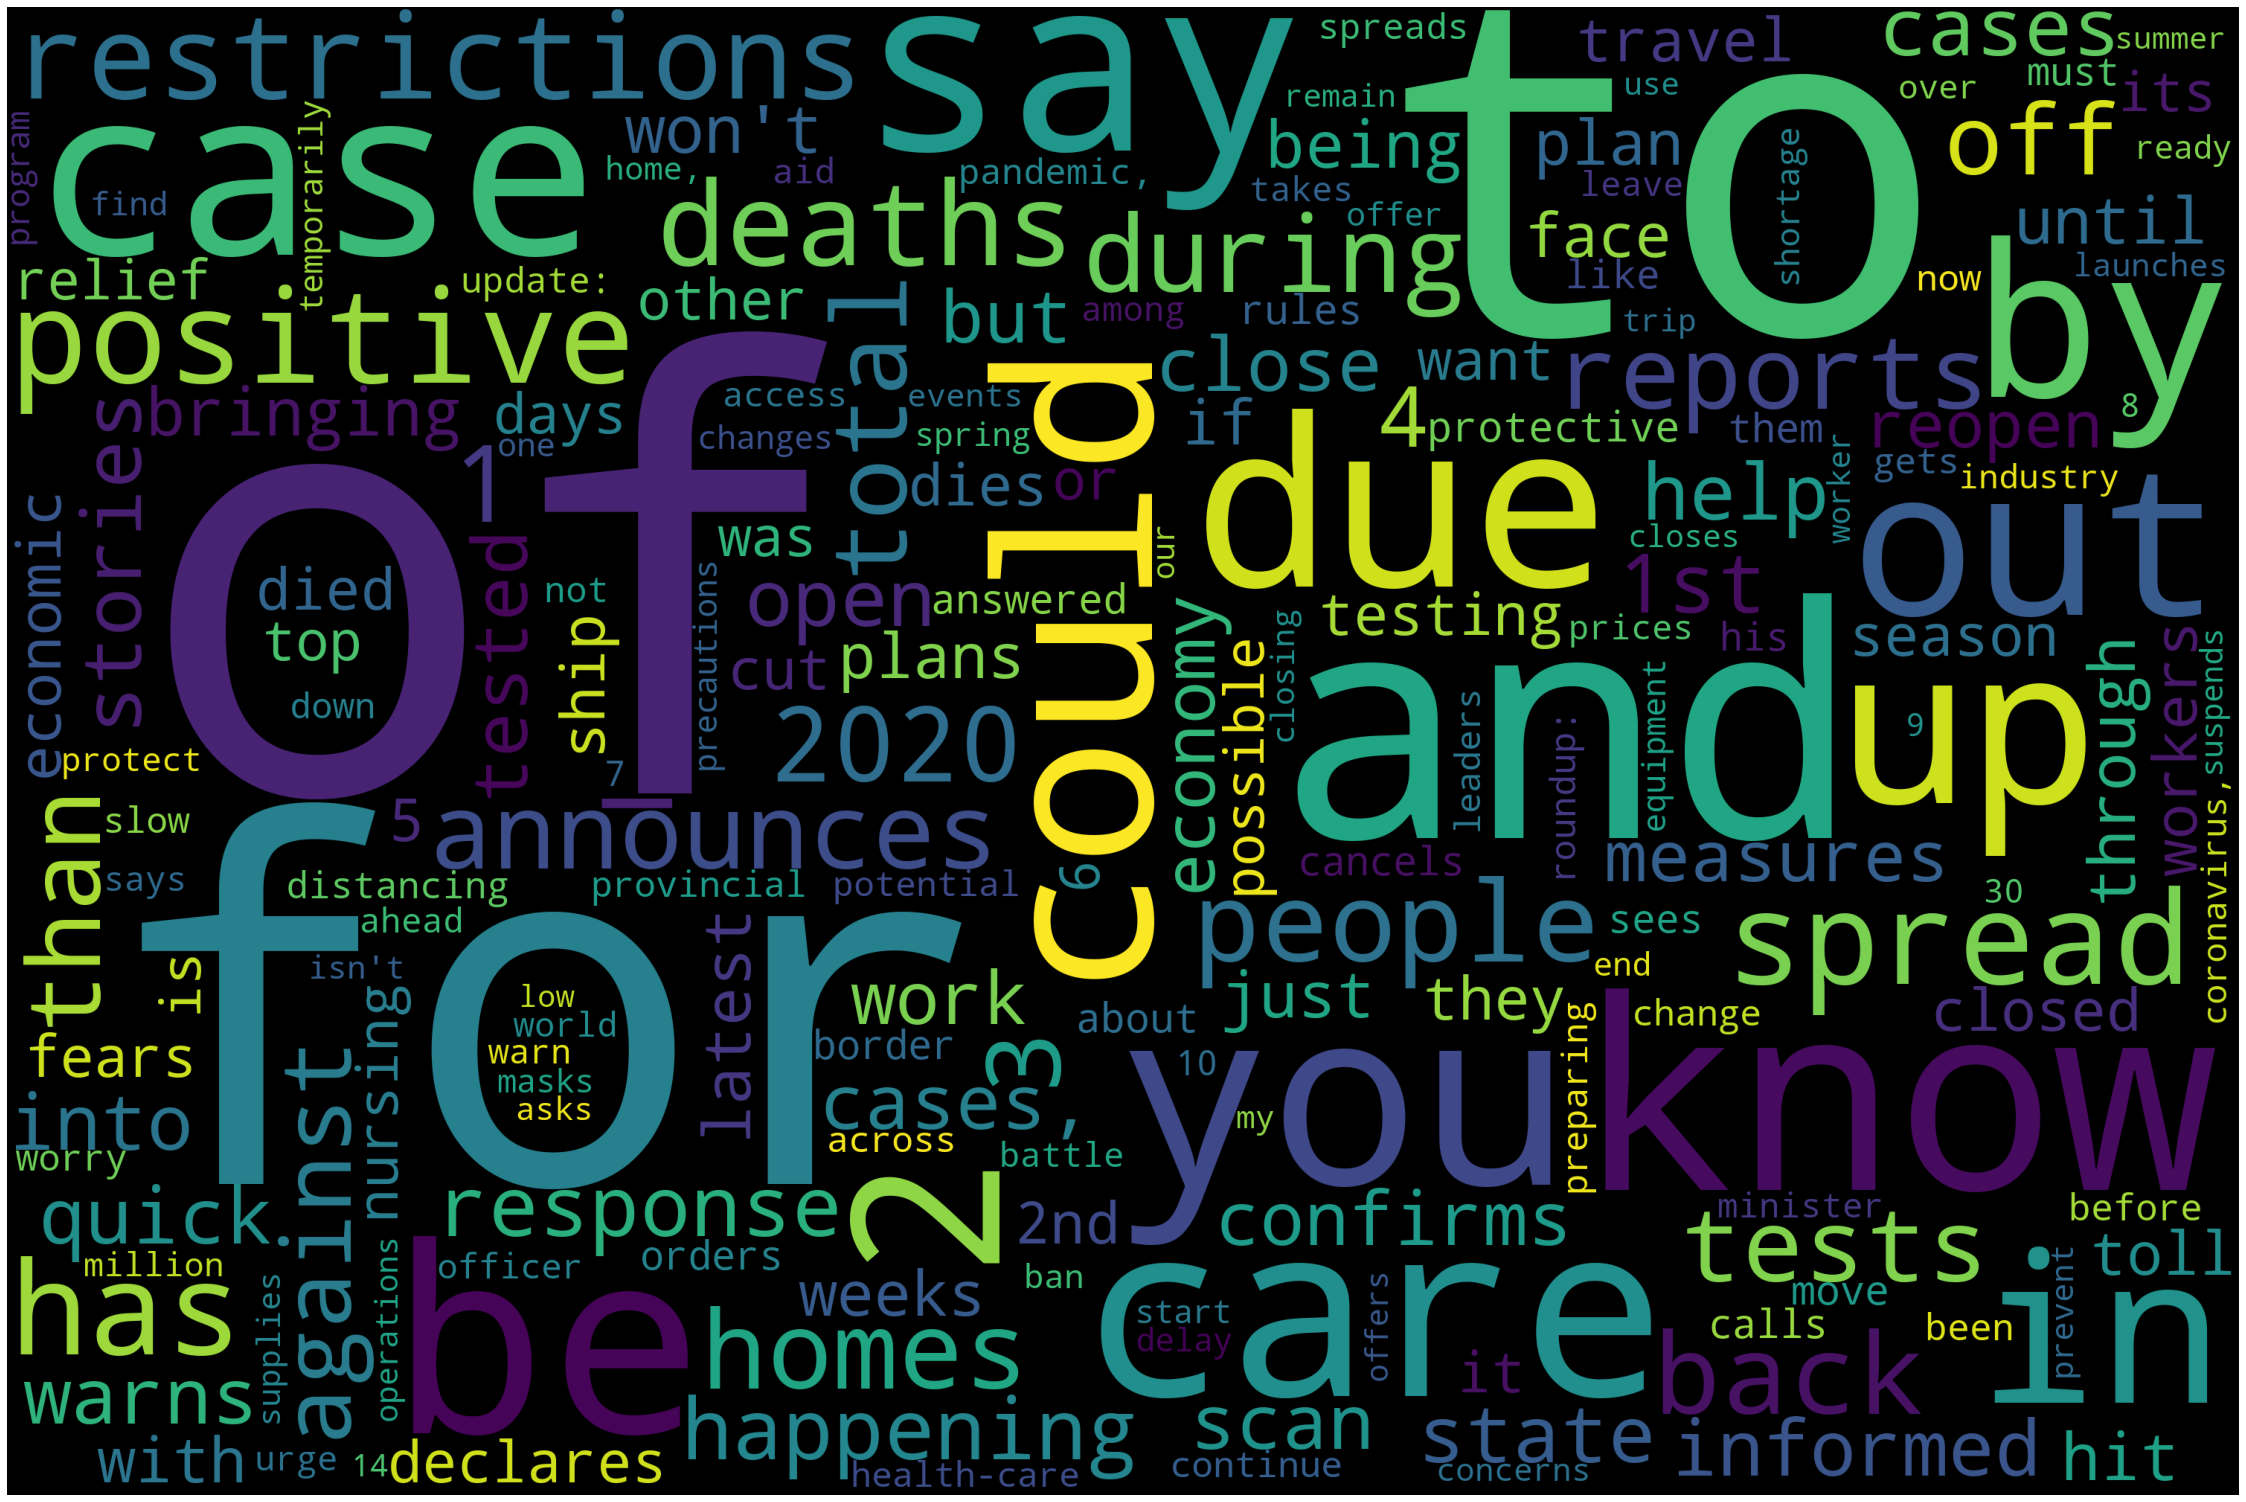

In [26]:
# This can take about a minute
# Retrieve the frequencies from the titles in the dataframe
frequencies = getFrequencyDictForText(' '.join(df["title"]))
# Create a word cloud based on the frequencies from the titles in the dataframe
word_cloud = WordCloud(width=3000, height=2000, random_state=1, collocations=False).generate_from_frequencies(frequencies)
# Plot the word cloud
plot_cloud(word_cloud)

Comme vous pouvez le voir, nous pouvons facilement utiliser la fréquence des termes des titres pour créer un nuage de mots. Ces nuages de mots peuvent être personnalisés pour être dans des arrière-plans d'image, avoir des couleurs personnalisées, etc.

Le nuage de mots ci-dessus contient des termes importants, mais la plupart des termes les plus fréquents ne sont pas très importants (ou sont des symboles/nombres). Ces termes qui apparaissent très fréquemment dans de nombreux types de documents, mais qui ne sont pas importants, sont appelés ***stopwords*** (***mots vides ou mots outils***). Par exemple, les mots *the*, *to* , *is*, *of*, ... sont des mots qui apparaissent extrêmement fréquemment dans le texte, mais qui ne fournissent aucune information significative quant au sujet traité dans le texte. Souvent, nous voulons supprimer ces mots vides. Pour cette raison, les bibliothèques de TAL, telles que spaCy, fournissent des méthodes pour détecter quels mots sont des mots vides. Vous trouverez ci-dessous un exemple de la façon dont spaCy peut être utilisé pour déterminer si un mot est un mot vide (basé sur la phrase utilisée dans le premier exemple de la partie 1).

In [27]:
# Call our spaCy object to retrieve the results of running the sentence through the NLP Pipeline
# Note that we can reuse the sp variable without redefining it.
sentence_example_content = sp(sentence_example)
for token in sentence_example_content:
    print("Text: " + str(token.text) + " Is stopword: " + str(token.is_stop))

Text: Government Is stopword: False
Text: guidelines Is stopword: False
Text: in Is stopword: True
Text: Canada Is stopword: False
Text: recommend Is stopword: False
Text: that Is stopword: True
Text: people Is stopword: False
Text: stay Is stopword: False
Text: at Is stopword: True
Text: least Is stopword: True
Text: two Is stopword: True
Text: metres Is stopword: False
Text: away Is stopword: False
Text: from Is stopword: True
Text: others Is stopword: True
Text: as Is stopword: True
Text: part Is stopword: True
Text: of Is stopword: True
Text: physical Is stopword: False
Text: distancing Is stopword: False
Text: measures Is stopword: False
Text: to Is stopword: True
Text: curb Is stopword: False
Text: the Is stopword: True
Text: spread Is stopword: False
Text: of Is stopword: True
Text: COVID-19 Is stopword: False
Text: . Is stopword: False


Ainsi, dans les prochaines questions, vous explorerez différentes manières de manipuler les données de titre avant de générer les fréquences pour créer les nuages de mots. Cela se traduira par différents nuages de mots qui nous permettront de visualiser les termes importants du texte en fonction de certains critères.

Pour les prochaines questions, vous pourrez vous référer aux exemples de la partie 1 qui montrent comment spaCy peut être utilisé pour effectuer la lemmatisation et le POS-tagging et l'exemple ci-dessus qui montre comment spaCy peut être utilisé pour effectuer la détection de mots vides.

**(TO DO) Q6 - 2 points**    

Créez un nuage de mots en fonction de la fréquence du contenu des titres des documents, là où les mots vides sont supprimés (vous devez utiliser spaCy pour trouver les mots vides).

*Assurez-vous d'utiliser random_state = 1 lors de la génération du nuage de mots.*

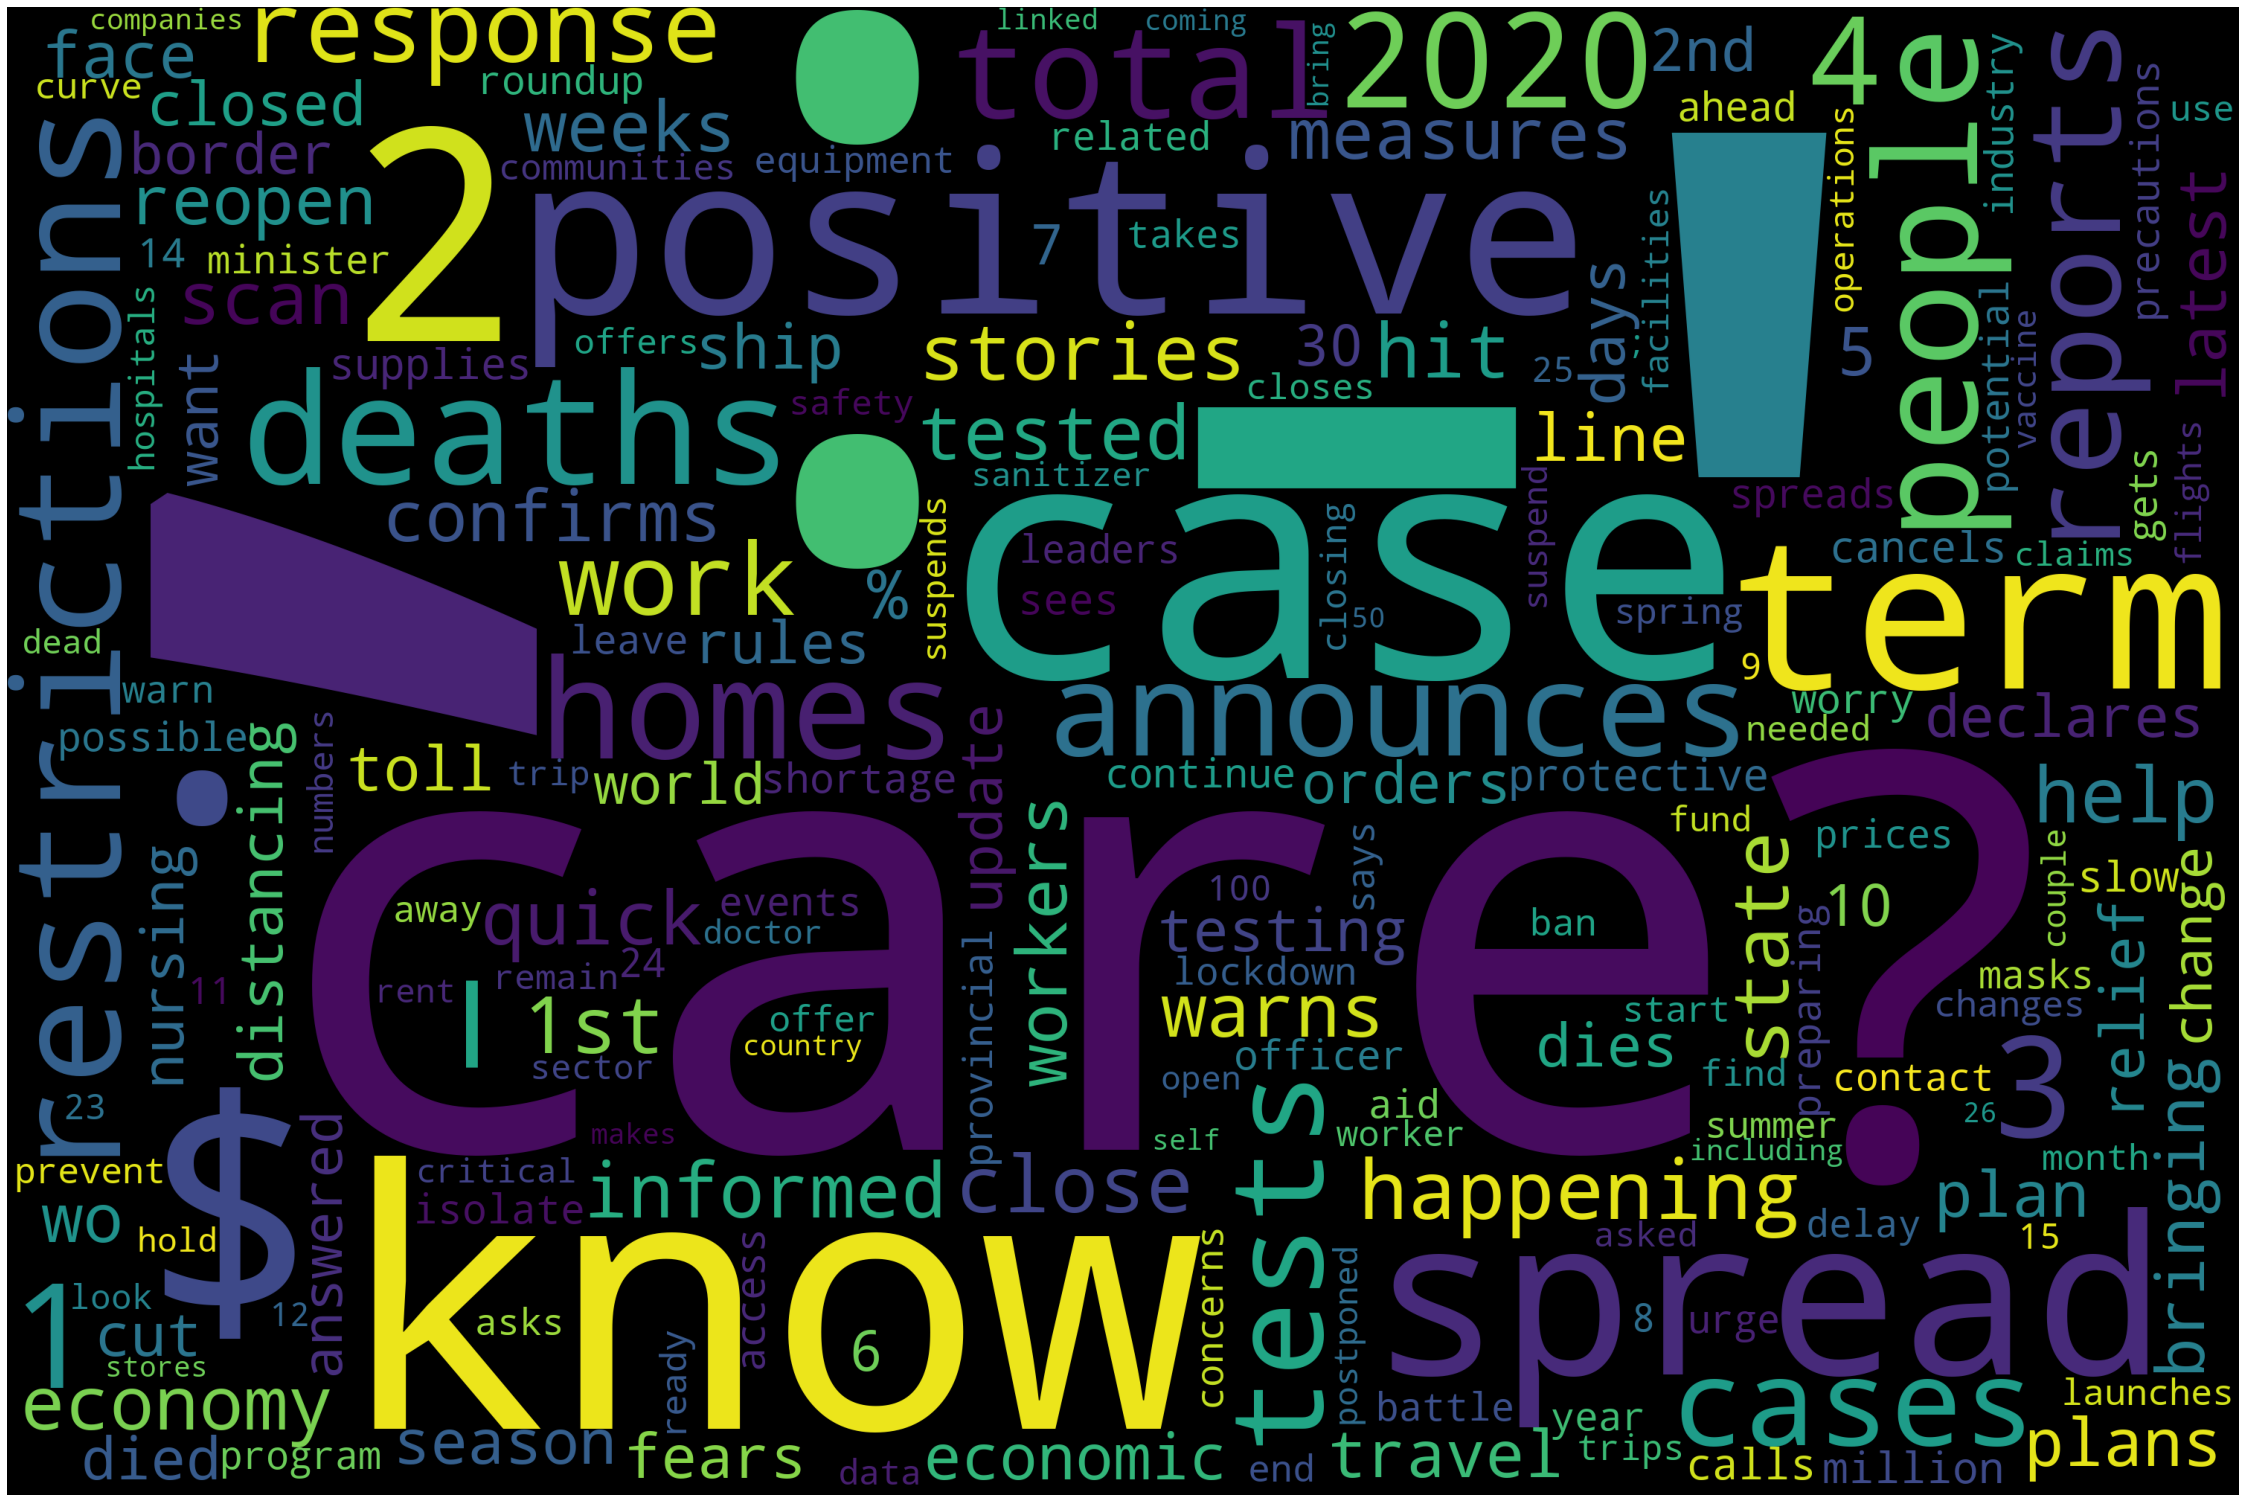

In [40]:
# RÉPONSE Q6 - 
# Get the titles and run them through spaCy
titles = sp(' '.join(df["title"]))
# Create a string of any token that is not a stopword
titlesString = "" 
for i in titles:
    if(i.is_stop == False and i.text):
        titlesString += str(i.text)
        titlesString += " "
# Get the frequencies
frequencies2 = getFrequencyDictForText(titlesString)
# Create the word cloud (with random_state=1)
word_cloud2 = WordCloud(width=3000, height=2000, random_state=1, collocations=False).generate_from_frequencies(frequencies2)
# Plot the word cloud
plot_cloud(word_cloud2)


**(TO DO) Q7 - 3 points**    

a) (2 points) Créez un nuage de lemmes (un lemme est issu de la lemmatisation d'un token) basé sur la fréquence du contenu des titres des documents avec les mots vides supprimés, où les lemmes proviennent de spaCy.

b) (1 point) Ensuite, comparez le nuage de mots résultant avec le nuage de mots généré à Q6. Quelle est la différence entre les deux?  Donnez des exemples spécifiques de différence.

*Assurez-vous d'utiliser random_state = 1 lors de la génération du nuage de mots.*

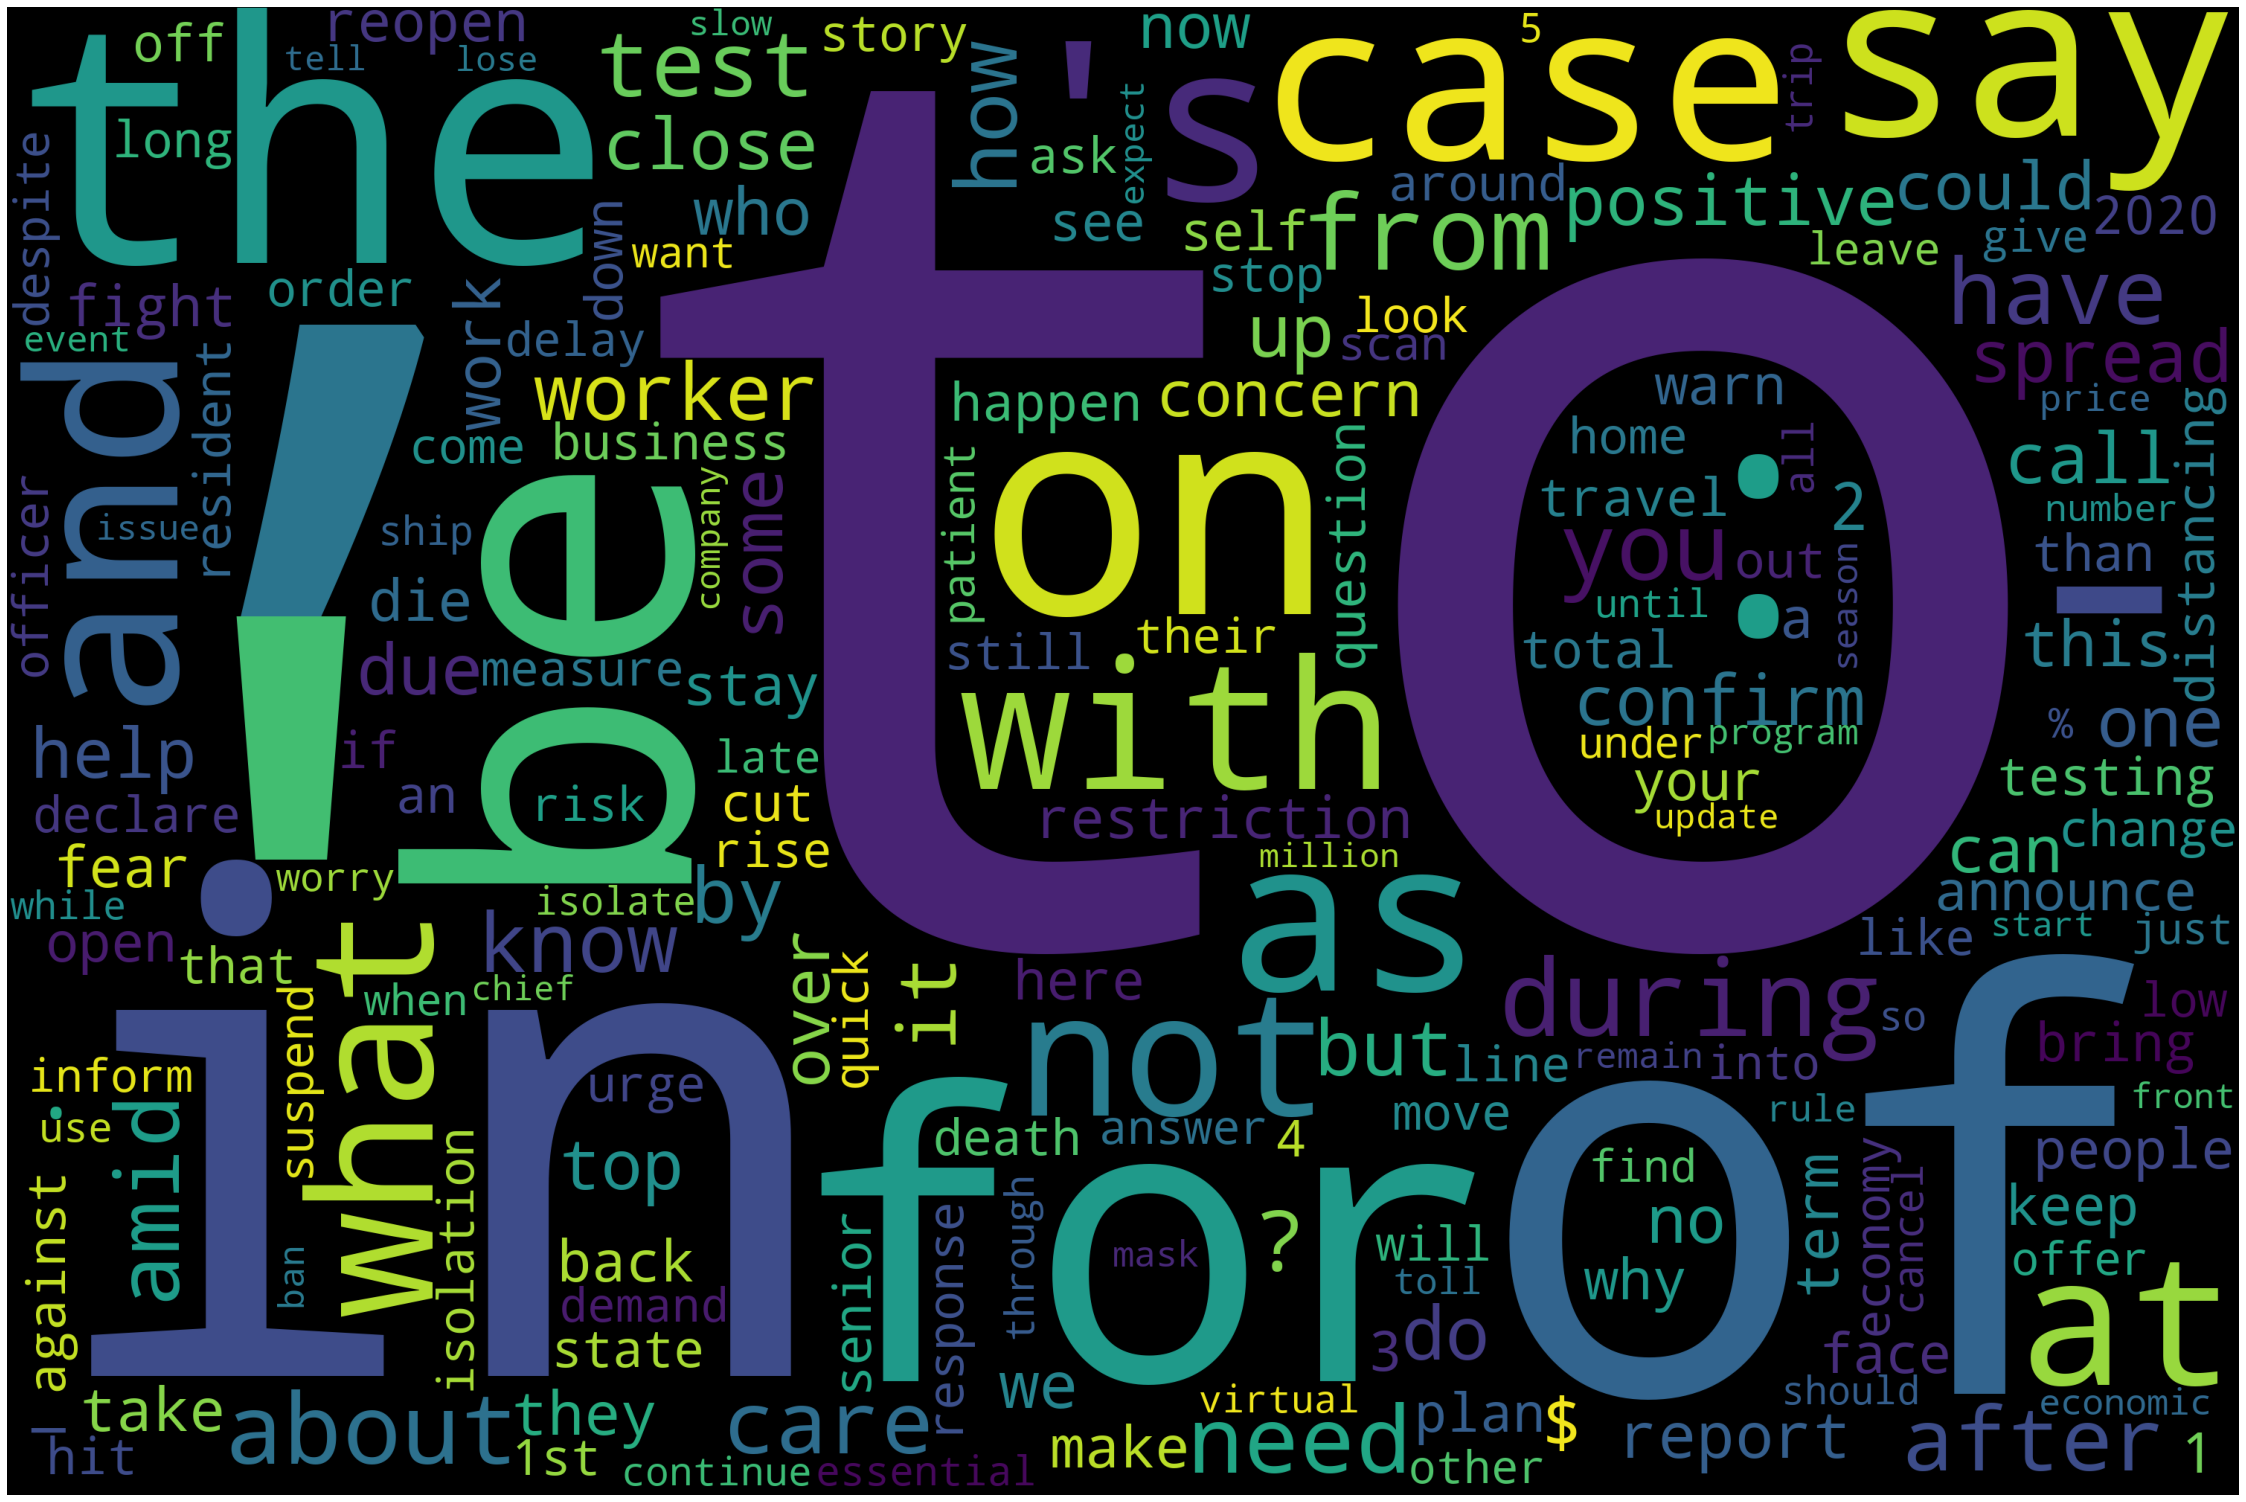

In [41]:
# RÉPONSE Q7(a)
# Make a lemma cloud
titlesString2 = "" 
for token in titles:
    if(token.text):
        titlesString2 += token.lemma_
        titlesString2 += " "
# Get the frequencies
frequencies3 = getFrequencyDictForText(titlesString2)
# Create the word cloud (with random_state=1)
word_cloud3 = WordCloud(width=3000, height=2000, random_state=1, collocations=False).generate_from_frequencies(frequencies3)
# Plot the word cloud
plot_cloud(word_cloud3)

**RÉPONSE Q7 (b)**    
Le mot "case" est toujours très fréquent, mais moins qu'en Q6. Le mot "to" est devenu le mot le plus fréquent. Les mots les plus fréquents ne sont plus des noms, des verbe ou des adjectifs comme en Q6. 



**(TO DO) Q8 - 3 points**    

Construisez un nuage de mots basé sur le contenu des titres des documents où seuls les *adjectifs* sont utilisés ET où tous les mots vides sont supprimés ET où les lemmes sont ajoutés (plutôt que le texte).

*Assurez-vous d'utiliser random_state = 1 lors de la génération du nuage de mots.*

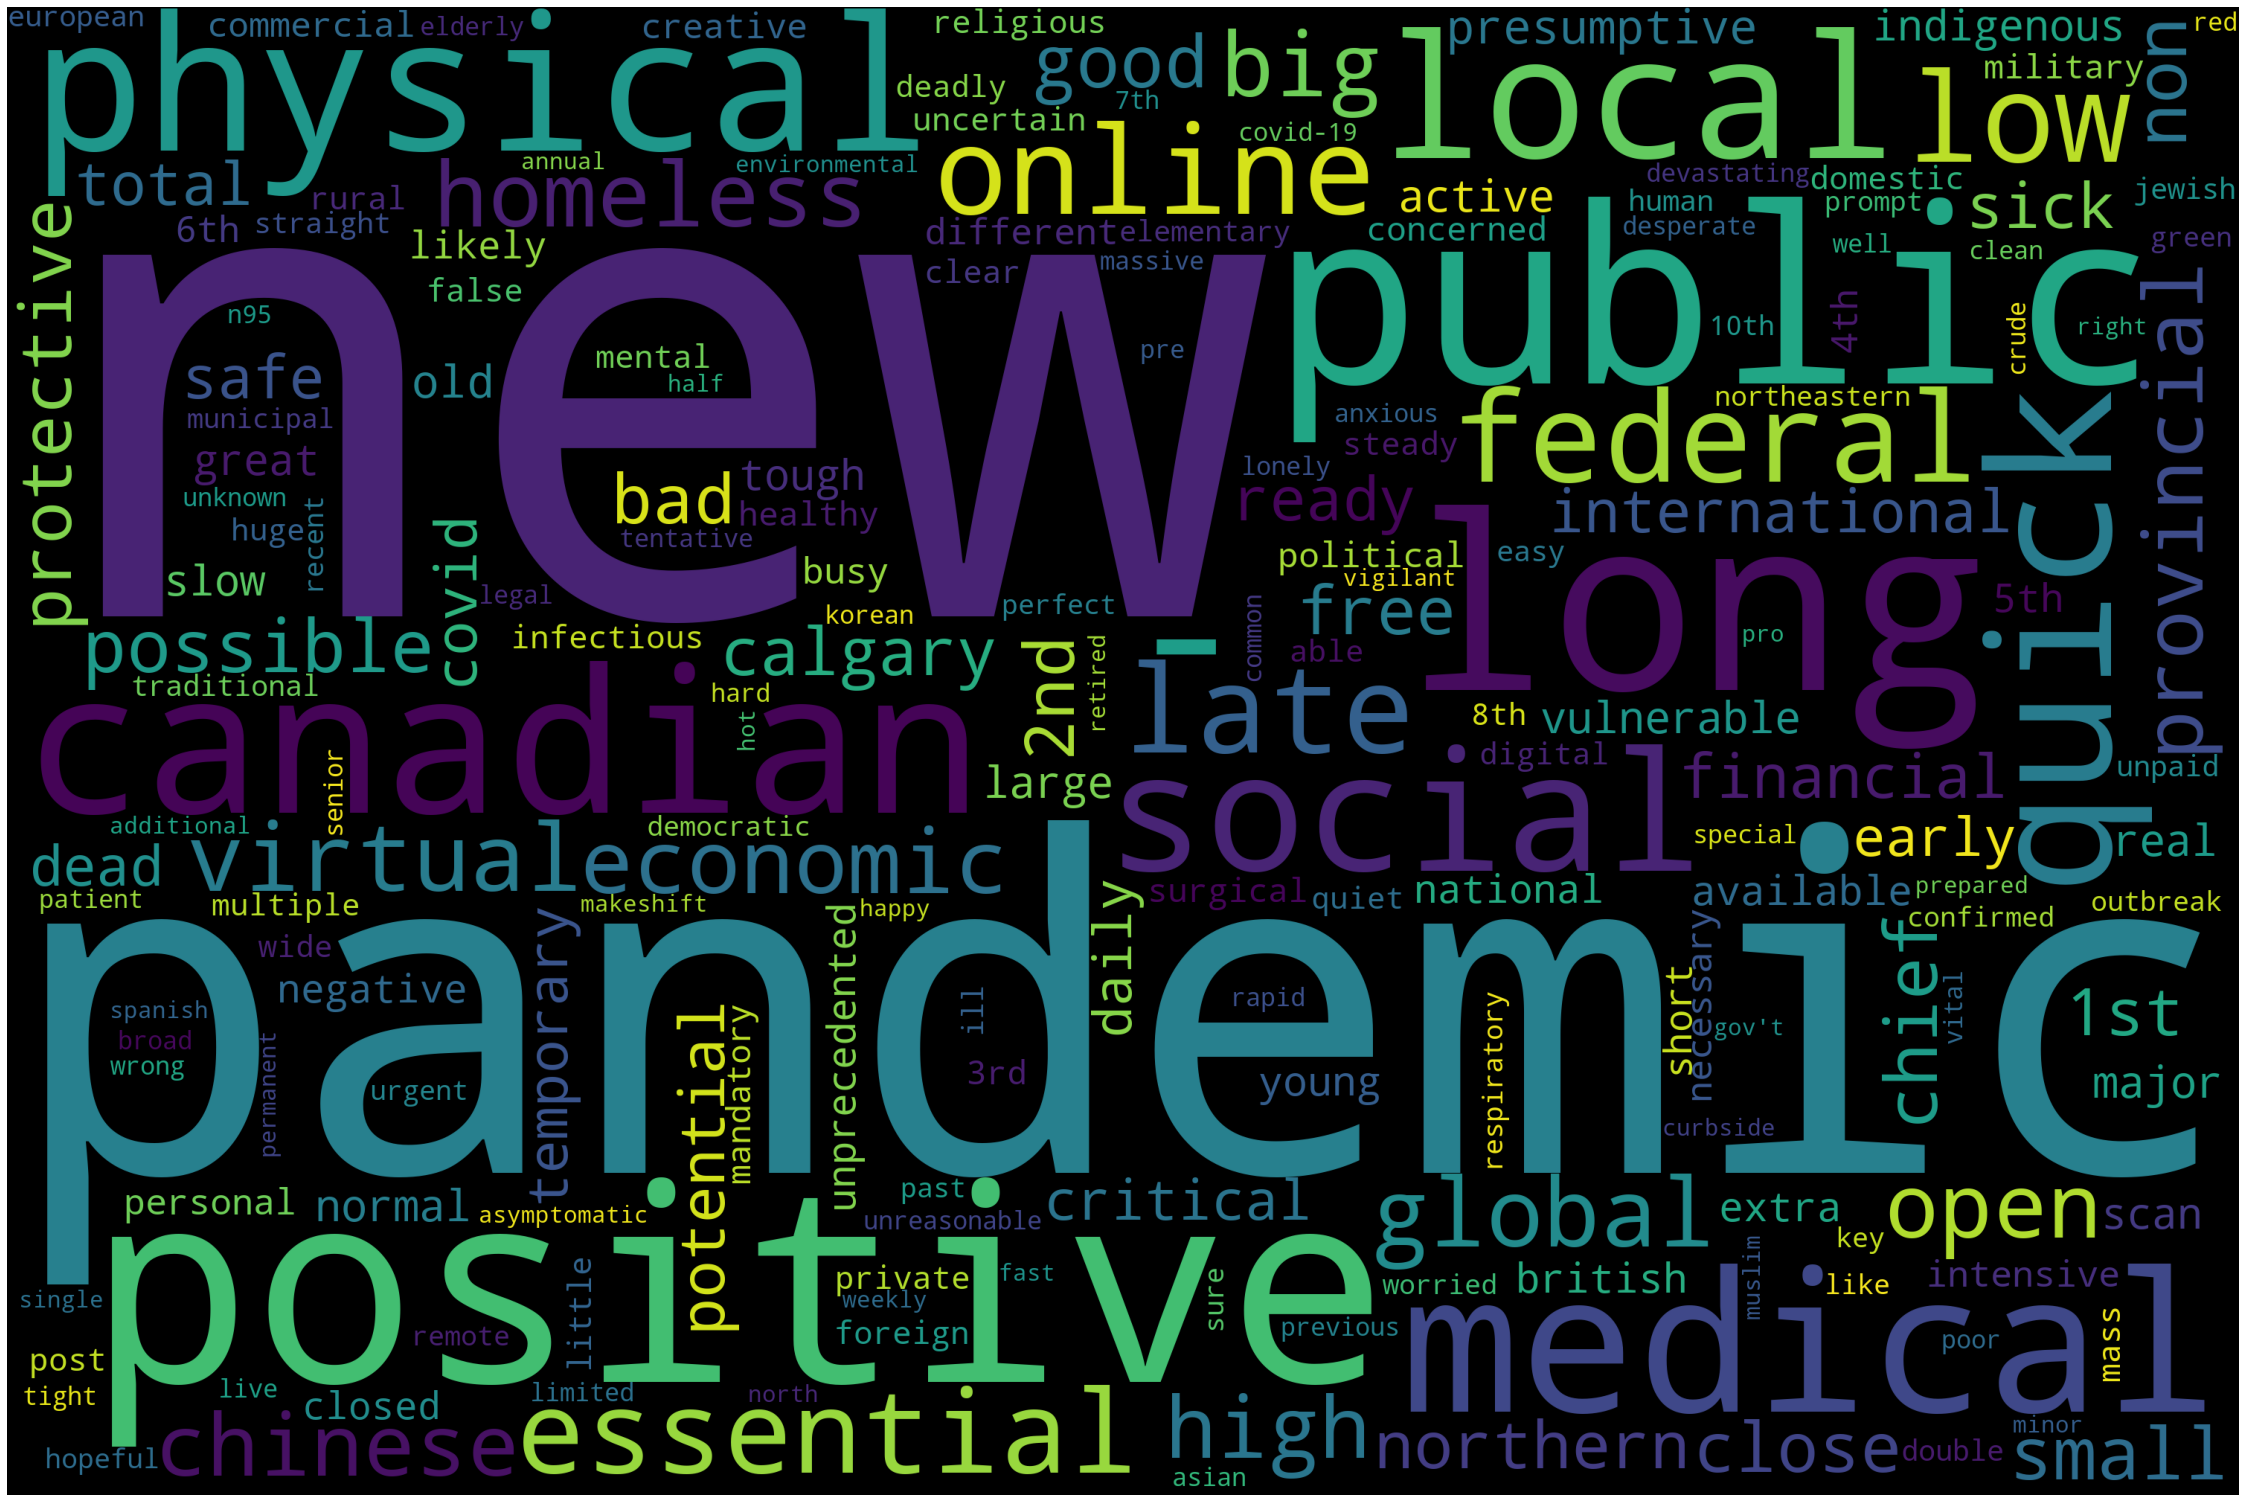

In [42]:
# RÉPONSE Q8
# Word cloud with stopwords removed, only using the lemmas of the adjectives
titlesString3 = "" 
for token in titles:
    if(token.text and token.is_stop == False and token.pos_ == "ADJ"):
        titlesString3 += token.lemma_
        titlesString3 += " "
# Get the frequencies
frequencies4 = getFrequencyDictForText(titlesString3)
# Create the word cloud (with random_state=1)
word_cloud4 = WordCloud(width=3000, height=2000, random_state=1, collocations=False).generate_from_frequencies(frequencies4)
# Plot the word cloud
plot_cloud(word_cloud4)

**(TO DO) Q9 - 2 points**    

En vous basant sur votre propre choix, créez un nuage de mots basé sur le contenu des titres des documents où seuls les *verbes* ou les *noms* sont utilisés (vous en sélectionnez un avec lequel travailler) ET où tous les mots vides sont supprimé ET où les lemmes sont ajoutés (plutôt que le texte).

*Assurez-vous d'utiliser random_state = 1 lors de la génération du nuage de mots.*

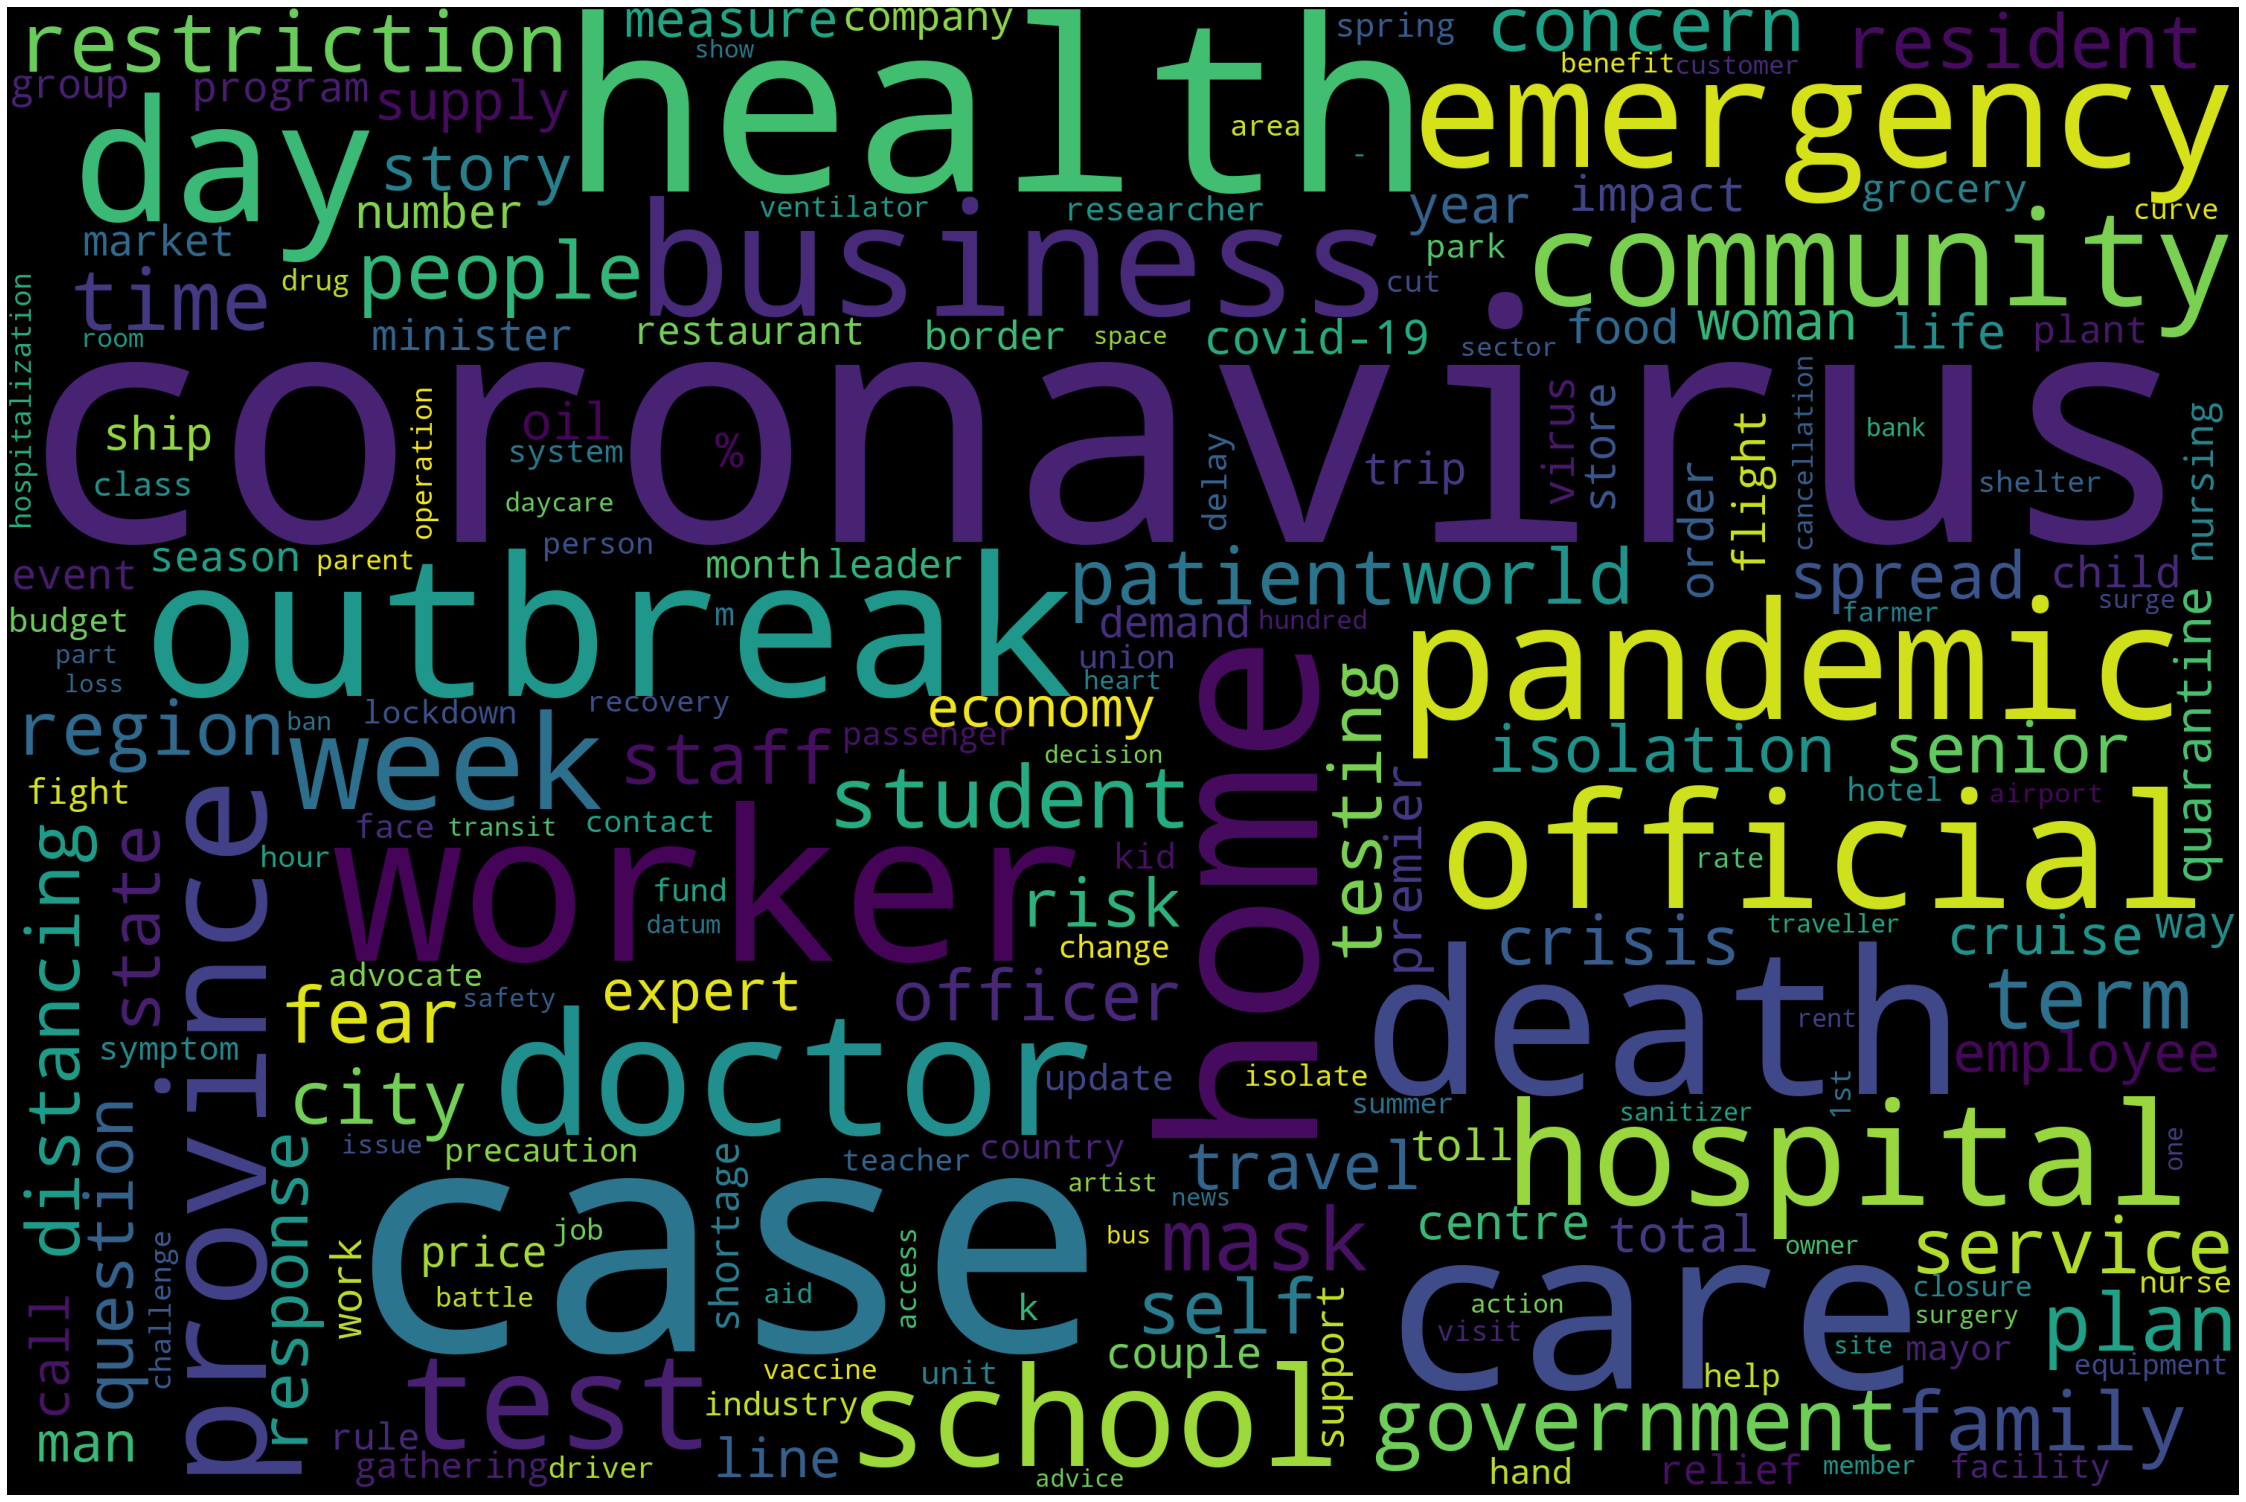

In [43]:
# RÉPONSE Q9
# Word cloud with either nouns or verbs only, stopwords removed, and lemmas used
titlesString4 = "" 
for token in titles:
    if(token.text and token.pos_ == "NOUN"):
        titlesString4 += token.lemma_
        titlesString4 += " "
# Get the frequencies
frequencies5 = getFrequencyDictForText(titlesString4)
# Create the word cloud (with random_state=1)
word_cloud5 = WordCloud(width=3000, height=2000, random_state=1, collocations=False).generate_from_frequencies(frequencies5)
# Plot the word cloud
plot_cloud(word_cloud5)


Maintenant que tous les nuages de mots ont été créés, vous pouvez les comparer pour analyser comment les techniques de TAL qui ont été effectuées ont eu un impact sur les nuages de mots générés.

**(TO DO) Q10 - 2 points**   

Parmi les nuages de mots que vous avez créés, selon vous, quel nuage de mots a fourni les termes les plus pertinents liés à Covid-19 et pourquoi ? Donnez quelques exemples de termes que vous jugez pertinents. Donnez des exemples de termes qui ne vous semblent pas pertinents.

**RÉPONSE Q10**

Le nuage de mot de la question 9 (Q9) est le plus pertinent, car il contient principalement des mots relié à la Covid-19. De plus, ces mots sont les plus fréquents tandis que dans les autres nuages de mots, les mots les plus fréquents n'étaient pas nécessairement associé à la Covid. Voici quelques mots pertinents: coronavirus, pandemic, emergency, health, hospital. Voici quelques mots non pertinent: advice, man, ship, oil, city, spring. 



***SIGNATURE:***
Mon nom est Mark-Olivier Poulin.
Mon numéro d'étudiant(e) est 300058025.
Je certifie être l'auteur(e) de ce devoir.